In [2]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

NITER = 1000000
NX = 64 #number of sites along x-direction
NY = 64 #number of sites along y-direction
COUPLING_J = 1.0
COUPLING_h = 0.1
T_cr = 2.269

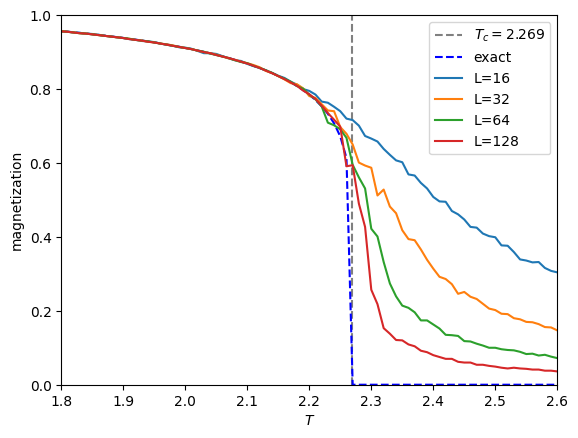

In [3]:
T = np.array([(i + 2)/100.0 for i in range(500)])
M = (1 - 1/np.sinh(2/T)**4)
M = [m**(1/8) if m > 0 else 0 for m in M]

if (os.path.exists('output/2d_Ising_L16_magnetization_metropolis.txt')):
    count = 0
    temperature_L16= np.empty(81)
    magnetization_L16 = np.empty(81)
    for read in open('output/2d_Ising_L16_magnetization_metropolis.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L16[count] = float(read[0])
        magnetization_L16[count] = float(read[1])
        count += 1
if (os.path.exists('output/2d_Ising_L32_magnetization_metropolis.txt')):
    count = 0
    temperature_L32 = np.empty(81)
    magnetization_L32 = np.empty(81)
    for read in open('output/2d_Ising_L32_magnetization_metropolis.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L32[count] = float(read[0])
        magnetization_L32[count] = float(read[1])
        count += 1
if (os.path.exists('output/2d_Ising_L64_magnetization_metropolis.txt')):
    count = 0
    temperature_L64 = np.empty(81)
    magnetization_L64 = np.empty(81)
    for read in open('output/2d_Ising_L64_magnetization_metropolis.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L64[count] = float(read[0])
        magnetization_L64[count] = float(read[1])
        count += 1
if (os.path.exists('output/2d_Ising_L128_magnetization_metropolis.txt')):
    count = 0
    temperature_L128 = np.empty(81)
    magnetization_L128 = np.empty(81)
    for read in open('output/2d_Ising_L128_magnetization_metropolis.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L128[count] = float(read[0])
        magnetization_L128[count] = float(read[1])
        count += 1
plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.8, 2.6)
plt.ylim(0, 1)
plt.plot(T, M, c='b', linestyle = "dashed", label='exact')
plt.plot(temperature_L16, magnetization_L16, label='L=16')
plt.plot(temperature_L32, magnetization_L32, label='L=32')
plt.plot(temperature_L64, magnetization_L64, label='L=64')
plt.plot(temperature_L128, magnetization_L128, label='L=128')
plt.xlabel(r'$T$')
plt.ylabel('magnetization')
plt.legend()
plt.show()

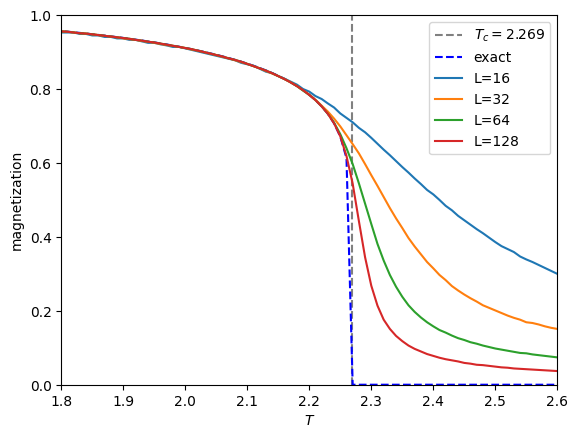

In [4]:
T = np.array([(i + 2)/100.0 for i in range(500)])
M = (1 - 1/np.sinh(2/T)**4)
M = [m**(1/8) if m > 0 else 0 for m in M]

if (os.path.exists('output/2d_Ising_L16_magnetization_wolff.txt')):
    count = 0
    temperature_L16_wolff = np.empty(81)
    magnetization_L16_wolff = np.empty(81)
    for read in open('output/2d_Ising_L16_magnetization_wolff.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L16_wolff[count] = float(read[0])
        magnetization_L16_wolff[count] = float(read[1])
        count += 1
if (os.path.exists('output/2d_Ising_L32_magnetization_wolff.txt')):
    count = 0
    temperature_L32_wolff = np.empty(81)
    magnetization_L32_wolff = np.empty(81)
    for read in open('output/2d_Ising_L32_magnetization_wolff.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L32_wolff[count] = float(read[0])
        magnetization_L32_wolff[count] = float(read[1])
        count += 1
if (os.path.exists('output/2d_Ising_L64_magnetization_wolff.txt')):
    count = 0
    temperature_L64_wolff = np.empty(81)
    magnetization_L64_wolff = np.empty(81)
    for read in open('output/2d_Ising_L64_magnetization_wolff.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L64_wolff[count] = float(read[0])
        magnetization_L64_wolff[count] = float(read[1])
        count += 1
if (os.path.exists('output/2d_Ising_L128_magnetization_wolff.txt')):
    count = 0
    temperature_L128 = np.empty(81)
    magnetization_L128_wolff = np.empty(81)
    for read in open('output/2d_Ising_L128_magnetization_wolff.txt').readlines():
        read = read[:-2].split('   ')
        temperature_L128[count] = float(read[0])
        magnetization_L128_wolff[count] = float(read[1])
        count += 1
plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.8, 2.6)
plt.ylim(0, 1)
plt.plot(T, M, c='b', linestyle = "dashed", label='exact')
plt.plot(temperature_L16_wolff, magnetization_L16_wolff, label='L=16')
plt.plot(temperature_L32_wolff, magnetization_L32_wolff, label='L=32')
plt.plot(temperature_L64_wolff, magnetization_L64_wolff, label='L=64')
plt.plot(temperature_L128, magnetization_L128_wolff, label='L=128')
plt.xlabel(r'$T$')
plt.ylabel('magnetization')
plt.legend()
plt.show()

In [31]:
img_list = []
fig = plt.figure()

for i in range(1, 1000):
    if(os.path.exists(f'output/fig_t4/2d_Ising_Metropolis_output_config_{i}.txt')):
        spin = np.empty((NX,NY))
        for read in open(f'output/fig_t4/2d_Ising_Metropolis_output_config_{i}.txt').readlines():
            read = read[:-2].split(' ')
            ix = int(read[0])
            iy = int(read[1])
            spin[ix,iy] = read[2]
        img = plt.imshow(spin, interpolation='nearest', vmin=0, vmax=1, cmap='jet', animated=True)
        time = plt.text(0.5, 1.1, f'Iteration:{i*1000}', transform=plt.gca().transAxes, ha='center', va='center', fontsize="large")
        img_list.append([img, time])
    else:
        print('no input configuration')
        sys.exit()

anim = animation.ArtistAnimation(fig, img_list, interval=10)
HTML(anim.to_jshtml())

# anim.save("2d_ising_monte_carlo_t2.gif")

no input configuration


SystemExit: 

/Users/tatsuya.miyata/repos/src/github.com/crowdworksjp/MCMC/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 640x480 with 0 Axes>

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t1.txt')):
    iteration_t1 = np.empty(10000)
    total_plus_spin_t1 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t1.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t1[count] = int(read[0])
        total_plus_spin_t1[count] = float(int(read[2])/(NX*NY))
        count += 1

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t2.txt')):
    iteration_t2 = np.empty(10000)
    total_plus_spin_t2 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t2.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t2[count] = int(read[0])
        total_plus_spin_t2[count] = float(int(read[2])/(NX*NY))
        count += 1

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t2.25.txt')):
    iteration_t225 = np.empty(10000)
    total_plus_spin_t225 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t2.25.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t225[count] = int(read[0])
        total_plus_spin_t225[count] = float(int(read[2])/(NX*NY))
        count += 1

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t2.5.txt')):
    iteration_t25 = np.empty(10000)
    total_plus_spin_t25 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t2.5.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t25[count] = int(read[0])
        total_plus_spin_t25[count] = float(int(read[2])/(NX*NY))
        count += 1

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t3.txt')):
    iteration_t3 = np.empty(10000)
    total_plus_spin_t3 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t3.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t3[count] = int(read[0])
        total_plus_spin_t3[count] = float(int(read[2])/(NX*NY))
        count += 1

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t4.txt')):
    iteration_t4 = np.empty(10000)
    total_plus_spin_t4 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t4.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t4[count] = int(read[0])
        total_plus_spin_t4[count] = float(int(read[2])/(NX*NY))
        count += 1

In [ ]:
count = 0
if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t5.txt')):
    iteration_t5 = np.empty(10000)
    total_plus_spin_t5 = np.empty(10000)
    for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t5.txt').readlines():
        read = read[:-2].split('   ')
        iteration_t5[count] = int(read[0])
        total_plus_spin_t5[count] = float(int(read[2])/(NX*NY))
        count += 1

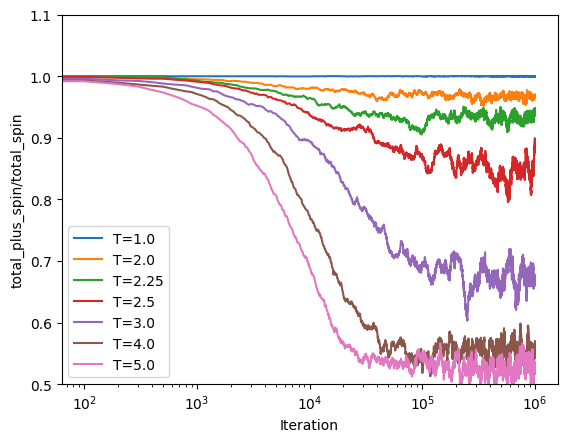

In [ ]:
# メトロポリス法

plt.ylim(0.5, 1.1)
plt.xlabel('Iteration')
plt.ylabel('total_plus_spin/total_spin')
plt.plot(iteration_t1, total_plus_spin_t1, label="T=1.0")
plt.plot(iteration_t2, total_plus_spin_t2, label="T=2.0")
plt.plot(iteration_t225, total_plus_spin_t225, label="T=2.25")
plt.plot(iteration_t25, total_plus_spin_t25, label="T=2.5")
plt.plot(iteration_t3, total_plus_spin_t3, label="T=3.0")
plt.plot(iteration_t4, total_plus_spin_t4, label="T=4.0")
plt.plot(iteration_t5, total_plus_spin_t5, label="T=5.0")
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
count = 0
if (os.path.exists(f'output/2d_Ising_simulated_annealing_output.txt')):
    temperature = np.empty(10000)
    total_plus_spin_sa = np.empty(10000)
    for read in open(f'output/2d_Ising_simulated_annealing_output.txt').readlines():
        read = read[:-2].split('   ')
        temperature[count] = float(read[3])
        total_plus_spin_sa[count] = float(int(read[1])/(NX*NY))
        count += 1

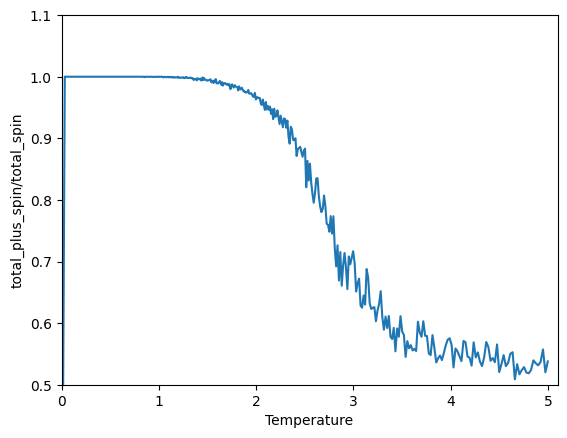

In [ ]:
plt.xlim(0.0, 5.1)
plt.ylim(0.5, 1.1)
plt.xlabel('Temperature')
plt.ylabel('total_plus_spin/total_spin')
plt.plot(temperature, total_plus_spin_sa)
plt.show()